# Second Order finite difference scheme for two point Boundary value Problem


Given boundary value problem : 
$$
-u''(x) = f(x), \qquad x \in (0,1)
$$

Subject to the conditions : 
$$
u(0) = a = 0,  \qquad u'(1) = b = 1
$$

We will define a uniform grid of $n+1$ points from $x_{0} = 0$ to $x_{n+1} = 1$ with spacing
$$
h = \frac{1}{n+1}
$$
and
$$
x_j = j h, \qquad 0 \le j \le n+1
$$



Let the numerical solution 

$$
U_{j} \approx u(x_{j})
$$

## Scheme S1

Approximate $u''$ using second order central difference

\begin{eqnarray*}
U_0 &=& a \\
-\frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}} &=& f_j, \qquad 1 \le j \le n \\
\frac{U_{n+1} - U_{n}}{h} &=& b
\end{eqnarray*}

The boundary condition at $x=1$ is only first order accurate because

$$
\frac{U(x_{n+1}) - U(x_n)}{h} = u'(x_{n+1}) + O(h)
$$

Eliminating $U_0$, we get

\begin{eqnarray*}
- \frac{ - 2U_{1} + U_{2}}{h^{2}} &=& f_1 + \frac{a}{h^2}\\
- \frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}} &=& f_j, \qquad 2 \le j \le n \\
- \frac{U_{n+1} - U_{n}}{h^2} &=& \frac{b}{h}
\end{eqnarray*}

In matrix form, we have

$$
\frac{1}{h^2}
\begin{bmatrix} 
2 & -1 & 0 & \dots & 0 \\ 
-1 & 2 & -1 & \ddots & \vdots\\ 
0 & \ddots & \ddots & \ddots & 0 \\ 
\vdots & \ddots & -1 & 2 & -1 \\
0 & \dots & 0 & -1 & 1
\end{bmatrix}
\begin{bmatrix}
U_1 \\
U_2 \\
\vdots \\
U_n \\
U_{n+1} \end{bmatrix} = 
\begin{bmatrix}
f_1 + \frac{a}{h^2} \\
f_2 \\
\vdots \\
f_{n} \\
\frac{b}{h} \end{bmatrix}
$$

## Scheme S2

Introduce an artificial/ghost point $x_{n+2}$ and use central difference

\begin{eqnarray*}
U_0 &=& a \\
- \frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}} &=& f_j, \qquad 1 \le j \le n+1 \\
\frac{U_{n+2} - U_{n}}{2h} &=& b
\end{eqnarray*}

We want to eliminate $U_{n+2}$

\begin{eqnarray*}
- \frac{ - 2U_{1} + U_{2}}{h^{2}} &=& f_1 + \frac{a}{h^2}\\
- \frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}} &=& f_j, \qquad 2 \le j \le n \\
- \frac{U_{n} - 2U_{n+1} + U_{n+2}}{h^{2}} &=& f_{n+1} \\
\frac{U_{n+2} - U_{n}}{2h} &=& b
\end{eqnarray*}

which leads to

\begin{eqnarray*}
- \frac{ - 2U_{1} + U_{2}}{h^{2}} &=& f_1 + \frac{a}{h^2}\\
- \frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}} &=& f_j, \qquad 2 \le j \le n \\
\frac{U_{n+1} - U_{n}}{h^{2}} &=& \frac{1}{2} f_{n+1} + \frac{b}{h}
\end{eqnarray*}

In matrix form, we have

$$
\frac{1}{h^2}
\begin{bmatrix}
2 & -1 & 0 & \dots & 0 \\ 
-1 & 2 & -1 & \ddots & \vdots\\ 
0 & \ddots & \ddots & \ddots & 0 \\ 
\vdots & \ddots & -1 & 2 & -1 \\
0 & \dots & 0 & -1 & 1
\end{bmatrix}
\begin{bmatrix}
U_1 \\
U_2 \\
\vdots \\
U_n \\
U_{n+1} \end{bmatrix} = 
\begin{bmatrix}
f_1 + \frac{a}{h^2} \\
f_2 \\
\vdots \\
f_{n} \\
\frac{1}{2} f_{n+1} + \frac{b}{h} \end{bmatrix}
$$

We have the same matrix on the left, but the right hand side vector has an extra term in the last entry.

We can similarly define these matrices for different values of n.

Here, we will implement a function $solve()$ in which inputs will be $n$ and $scheme$ and output will be $X$(i.e. vector for grid points) and $V$(vector for approximated values of function **u**).

We will plot the approximated values and original function u on graph and then calculate the error for different values of n and plot them.
## Error Calculation
Error for a specific value of h can calculated by:
$$
E_{h} = max |u(x_{j}) - U_{j}|, \qquad 0 \le j \le n+1
$$

where $U_{j}$ is approximated value for u($x_{j}$).


After plotting $E_{h}$ vs $h$, we will observe that :-
$$
E_{h} \propto h.
$$

And $E_{h}$ satisfies a bound of the form:-
$$
E_{h} = O(h^{2}).
$$

## Convergence Matrix
Finally, we will find the convergence matrix that shows how fast the approximated values are converging towards original function values with respect to n.
Rate of Convergence, $\alpha$, for both schemes can be calculated by:
$$
\alpha = \frac{log(e_{h_{1}}/e_{h_{2}})}{log({h_{1}/h_{2}})}
$$

where 
$e_{h_{1}}$ is error of scheme for stepsize $h_{1}.$

$h_{1}$ is stepsize for number of grid points $n_{1}$
$$
h_{1} = \frac{1}{n_{1} + 1}
$$

$e_{h_{2}}$ is error of scheme for stepsize $h_{2}.$

$h_{2}$ is stepsize for number of grid points $n_{2}$
$$
h_{2} = \frac{1}{n_{2} + 1}
$$

We will form a Convergence matrix for different values of stepsize using above expression. This matrix will show how fast the approximated values are converging towards original function with respect to n.

In [1]:
#importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
import scipy.linalg as la
%config InlineBackend.figure_format = 'svg'

In [2]:
xmin, xmax = 0.0, 1.0 # domain
a = 0.0 # left dirichlet boundary
b = 1.0 # right neumann boundary

def solve(n, scheme):
    h = (xmax - xmin)/(n+1)
    A = diags([-1.0,2.0,-1.0],[-1,0,1], shape = (n+1,n+1)).toarray()
    A[n,n] = 1
    X = np.linspace(xmin+h, xmax, n+1)                   #X array
    F = -np.exp(X-1)                                     #array for f(X) = -e^(X-1)
    B = h**2 * F 
    B[0] = B[0] + a
    if scheme == 'S1':
        B[n] = b*h                                       #last entry change
    else:    
        B[n] = (0.5*B[n]) + (b*h)
                               
    lu,piv = la.lu_factor(A)
    y = la.lu_solve((lu,piv),B)                          #solving linear equations
    return(X,y)

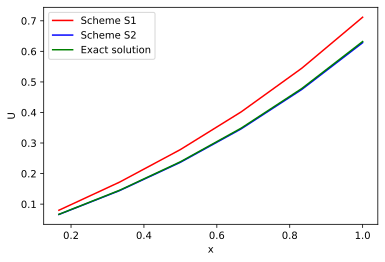

In [3]:
x1,u1 = solve(n = 5 , scheme = 'S1')              #function call for solving linear equations
x2, u2 = solve(n = 5, scheme = 'S2')
Uex = (1/np.e)* (np.exp(x1)-1)                    # exact function array
plt.plot(x1,u1, color='r', label = 'Scheme S1')
plt.plot(x2,u2,color = 'b', label = 'Scheme S2')
plt.plot(x1,Uex, color = 'g', label = 'Exact solution')
plt.xlabel('x')
plt.ylabel('U')
plt.legend()
plt.show()

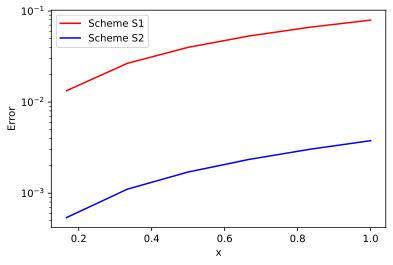

In [4]:
plt.semilogy(x1,np.abs(u1-Uex), color='r', label = 'Scheme S1')
plt.semilogy(x2,np.abs(u2-Uex),color = 'b', label = 'Scheme S2')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.show()

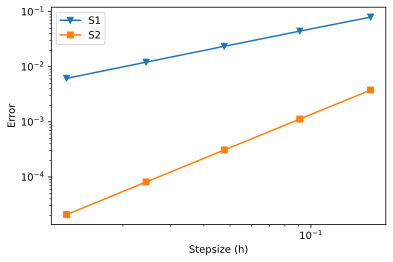

In [5]:
#for finding error
n = 5                                             #setting initial value of number of grid points
iterations = 5
max_error_1 = []
max_error_2 = []
grids = []
step_size = []
for i in range(iterations):
    x1,u1 = solve(n, scheme = 'S1')
    x2,u2 = solve(n, scheme = 'S2')
    Uorig = (1/np.e)* (np.exp(x1)-1)
    max_error_1.append(np.max(abs(Uorig-u1)))
    max_error_2.append(np.max(abs(Uorig-u2)))
    grids.append(n)
    step_size.append(x1[1]-x1[0])
    n *= 2                                     #doubling number of grid points after each iteration    
plt.xlabel('Stepsize (h)')
plt.ylabel('Error')
plt.loglog(step_size,max_error_1,'-v', label = 'S1')   #log(error) vs log(h) plot     
plt.loglog(step_size,max_error_2,'-s', label = 'S2')
plt.legend()


## Linear Least squares fit for $log(Error)$ $vs$ $log(h)$ plot.
Now, we will do a linear least squares fit for the log(error) vs log(h) plot.
Let equation of line for log(error) vs log(h) for both schemes be:-

$$
log(error) = m*log(h) + c
$$
where m and c are the constants to be determined.

Determination of m and c will be based on the Linear least squares method in which we try to minimize the difference between actual value of y(here $y = log(error)$) and calculated value of y.

$Error(E)$ can be defined as :

$$
E = ((y_{1,actual} - y_{1,computed})^{2} + (y_{2,actual} - y_{2,computed})^{2} + ......+ (y_{n,actual} - y_{n, computed})^{2})^{1/2}
$$



To find the best curve, we will minimize the $Error(E)$ with respect to $m$ and $c$ by finding:- 

$$
\frac{\partial E}{\partial m} = 0, \frac{\partial E}{\partial c} = 0.
$$

This will give constants m and c as follows:-
$$
m = \frac{n\sum xy - (\sum x)(\sum y)}{n\sum x^{2}-(\sum x)^{2}}.
$$
and
$$
c = y - mx.
$$
where
$$ 
y = log(error)
$$
and
$$
x = log(h)
$$
and 
$$
n = \text{number of iterations done}
$$

In [9]:
# linear least square fitting for log(error) vs log(h) 
X = np.log(step_size)
Y1 = np.log(max_error_1)
Y2 = np.log(max_error_2)
n = len(X)
num1 = ((n* np.sum(X*Y1)) - (np.sum(X) * np.sum(Y1)))
num2 = ((n* np.sum(X*Y2)) - (np.sum(X) * np.sum(Y2)))
denom = (n*np.sum(X*X)) - (np.sum(X) * np.sum(X))       
m1 = num1/denom
m2 = num2/denom
c1 = (np.sum(Y1 - m1*X))/n
c2 = (np.sum(Y2 - m2*X))/n
print('constants for log(error) vs log(h) for scheme S1 are:','m=',m1,'c=',c1)
print('constants for log(error) vs log(h) for scheme S2 are:','m=',m2,'c=',c2)

constants for log(error) vs log(h) for scheme S1 are: m= 0.9841285380494031 c= -0.760737602486714
constants for log(error) vs log(h) for scheme S2 are: m= 1.999718781140003 c= -1.9961203660089892


Equation of log(error) vs log(h) line for Scheme S1:
$$
log(error) = 0.9841285380494029* log(h) - 0.760737602486715
$$

Equation of log(error) vs log(h) line for Scheme S2:
$$
log(error) = 1.9997187811399968* log(h) - 1.9961203660090074
$$

Text(0, 0.5, 'log(Error)')

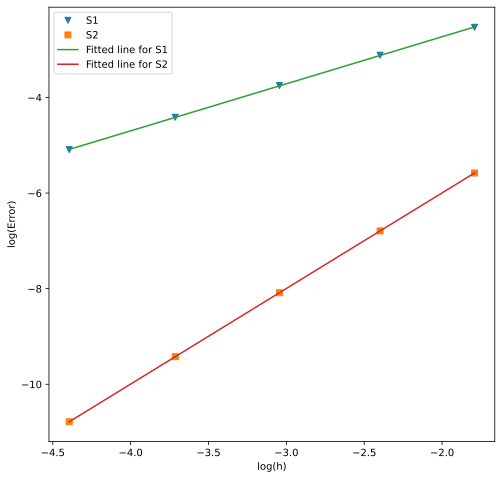

In [12]:
Y1 = m1*X + c1
Y2 = m2*X + c2
plt.figure(figsize=(8,8))
plt.plot(X, np.log(max_error_1),'v' ,label = 'S1')
plt.plot(X, np.log(max_error_2), 's',label = 'S2')
plt.plot(X, Y1, label = 'Fitted line for S1')
plt.plot(X, Y2, label = 'Fitted line for S2')
plt.legend()
plt.xlabel('log(h)')
plt.ylabel('log(Error)')

In [11]:
#for finding rate of convergence
a = len(step_size)
conv1 = []
conv2 = []  #array for rate of convergence        
for i in range(a-1):
    conv1.append((np.log(max_error_1[i]/max_error_1[i+1]))/(np.log(step_size[i]/step_size[i+1])))
    conv2.append((np.log(max_error_2[i]/max_error_2[i+1]))/(np.log(step_size[i]/step_size[i+1])))
print('S1 rate:', conv1)
print('S2 rate:', conv2)

S1 rate: [0.9648201522080332, 0.98144723805102, 0.9904634013093452, 0.9951640071605067]
S2 rate: [1.9990485047681494, 1.9997257588546846, 1.9999260594010908, 1.9999807794502218]


**This implies that Scheme S2 converges towards original function at a higher rate than Scheme S1 with respect to n(number of grid points) and hence Scheme S2 is a better approximation to original function than scheme S1.**